# EDA on Crime Dataset


In [ ]:

import pandas as pd  #Imported Pandas package
import numpy as np #Imported Numpy Package
import matplotlib.pyplot as plt #Imported Matplot library


# Intro

Whenever I start a class off, I like to make sure that students have basic EDA chops in Python. This semester I picked a structured time series dataset from Wikipedia which tracks violent crime per State over a few years. This homework tests your skill at using data to tell a story about crime in the US. Good luck!

![crime map from Wiki](https://upload.wikimedia.org/wikipedia/commons/5/51/Violent_Crime_Rate_by_U.S._state.svg)

In [ ]:
# read the data
df1 = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_violent_crime_rate')[0]

In [ ]:
# read the data
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_violent_crime_rate')[0]
df.head() # Head method used to print the records present at the top of the dataset

State or Territory            2020                     \
     State or Territory Incidence Count Violent Crime Rate   
0                   NaN             NaN                NaN   
1  District of Columbia          7127.0              999.8   
2                Alaska          6126.0              837.8   
3            New Mexico         16393.0              778.3   
4             Tennessee         46328.0              672.7   

  Historical Violent Crime Rates                                         \
                            2019   2018    2017    2016    2015    2014   
0                            NaN    NaN     NaN     NaN     NaN     NaN   
1                         1045.2  997.1  1002.7  1203.5  1269.1  1242.6   
2                          865.0  891.7   856.7   804.6   730.2   635.5   
3                          824.0  842.8   778.6   699.4   656.1   597.7   
4                          598.9  630.4   655.0   638.5   612.1   610.7   

                           
     2013    2012    2011  
0     NaN     NaN     NaN  
1  1281.9  1241.8  1202.1  
2   602.6   604.1   606.5  
3   596.7   559.6   567.5  
4   579.7   638.5   608.2

This dataset is a bit dirty - let's clean it up!

# Q1. Collapse the multi-index
The index is really a double index with two layers - which in my experience is quite annoying in most cases.

In [ ]:
# look at this complicated multiIndex - yuck!
df.columns #This line of code will print the column names of the dataframe 'df'.

MultiIndex([(            'State or Territory', 'State or Territory'),
            (                          '2020',    'Incidence Count'),
            (                          '2020', 'Violent Crime Rate'),
            ('Historical Violent Crime Rates',               '2019'),
            ('Historical Violent Crime Rates',               '2018'),
            ('Historical Violent Crime Rates',               '2017'),
            ('Historical Violent Crime Rates',               '2016'),
            ('Historical Violent Crime Rates',               '2015'),
            ('Historical Violent Crime Rates',               '2014'),
            ('Historical Violent Crime Rates',               '2013'),
            ('Historical Violent Crime Rates',               '2012'),
            ('Historical Violent Crime Rates',               '2011')],
           )

Read these articles then make a single set of sensible column names.
* https://stackoverflow.com/questions/14507794/how-to-flatten-a-hierarchical-index-in-columns
* https://stackoverflow.com/questions/19758364/rename-specific-columns-in-pandas

Like ['State', '2020_incidence_count', '2020_crime_rate', '2019_crime_rate', etc.]

In [ ]:
# look at this nice index
df1.columns = df1.columns.to_flat_index() #multi-level labels for the columns in the dataframe are converted to single-level labels.
print(df1)

   (State or Territory, State or Territory)  (2020, Incidence Count)  \
0                                       NaN                      NaN   
1                      District of Columbia                   7127.0   
2                                    Alaska                   6126.0   
3                                New Mexico                  16393.0   
4                                 Tennessee                  46328.0   
5                                  Arkansas                  20363.0   
6                                   Arizona                  35980.0   
7                                 Louisiana                  29704.0   
8                                  Missouri                  33385.0   
9                            South Carolina                  27691.0   
10                             South Dakota                   4476.0   
11                                 Michigan                  47641.0   
12                                  Montana                   50

In [ ]:
# nice names for each column (you can manually rename each column)
# or use something like _add_suffix
#This code changes the column names of the dataframe df1 to a list of new names.
df1.columns = ['State or Territory',
                    '2020_Incidence Count',
                     '2020_Violent Crime Rate',
                     '2019_Violent Crime Rate',
                    '2018_Violent Crime Rate',
                    '2017_Violent Crime Rate',
                     '2016_Violent Crime Rate',
                     '2015_Violent Crime Rate',
                     '2014_Violent Crime Rate',
                     '2013_Violent Crime Rate',
                    '2012_Violent Crime Rate',
                     '2011_Violent Crime Rate']

print(df1)

      State or Territory  2020_Incidence Count  2020_Violent Crime Rate  \
0                    NaN                   NaN                      NaN   
1   District of Columbia                7127.0                    999.8   
2                 Alaska                6126.0                    837.8   
3             New Mexico               16393.0                    778.3   
4              Tennessee               46328.0                    672.7   
5               Arkansas               20363.0                    671.9   
6                Arizona               35980.0                    654.8   
7              Louisiana               29704.0                    639.4   
8               Missouri               33385.0                    542.7   
9         South Carolina               27691.0                    530.7   
10          South Dakota                4476.0                    501.4   
11              Michigan               47641.0                    478.0   
12               Montana 

# Q2. What is the shape of the dataframe?
State the number of rows and number of columns.

In [ ]:
print('The number of rows and columns of the dataframe:')
df1.shape   #using shape method will defines the no.of rows and columns of the dataframe


The number of rows and columns of the dataframe:


(54, 12)

# Q3. Count the number of missing values per column, then print a list of unique values for the State/territory column.

Read this:
* https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan

Now drop any rows where the 'State or Territory' column is nan.

In [ ]:
print(df1.isnull().sum()) #print the number of null values in the dataframe df1
df1 = df1.dropna() #drop any rows of df1 with null values
print(list(set(df1['State or Territory']))) #print a list of the unique values in the 'State or Territory' column of df1

State or Territory         1
2020_Incidence Count       1
2020_Violent Crime Rate    1
2019_Violent Crime Rate    1
2018_Violent Crime Rate    1
2017_Violent Crime Rate    1
2016_Violent Crime Rate    1
2015_Violent Crime Rate    1
2014_Violent Crime Rate    1
2013_Violent Crime Rate    1
2012_Violent Crime Rate    1
2011_Violent Crime Rate    1
dtype: int64
['Alabama', 'Virginia', 'Missouri', 'Maine', 'Indiana', 'Ohio', 'United States', 'Wyoming', 'Michigan', 'Delaware', 'Louisiana', 'Kentucky', 'New Jersey', 'Florida', 'Iowa', 'West Virginia', 'Montana', 'Texas', 'Alaska', 'South Carolina', 'Hawaii', 'Maryland', 'Nebraska', 'Tennessee', 'Utah', 'New York', 'Minnesota', 'Colorado', 'Kansas', 'Georgia', 'California', 'Oregon', 'District of Columbia', 'Rhode Island', 'Wisconsin', 'Puerto Rico', 'Vermont', 'Nevada', 'Washington', 'Massachusetts', 'Arkansas', 'Pennsylvania', 'North Dakota', 'New Hampshire', 'South Dakota', 'Oklahoma', 'Illinois', 'North Carolina', 'Idaho', 'Mississippi', 

Read this:
* https://stackoverflow.com/questions/19960077/how-to-filter-pandas-dataframe-using-in-and-not-in-like-in-sql

Now drop values where this column is equal to District of Columbia, United States or Puerto Rico. How many rows do you have now?

In [ ]:
# This code creates a subset of the data frame df1 by removing all rows that have a value of 'District of Columbia', 'United States' or 'Puerto Rico' in the 'State or Territory' column.
#The new data frame is then printed and its shape is printed.
list1 = ['District of Columbia', 'United States', 'Puerto Rico']
df1 = df1[df1['State or Territory'].isin(list1) == False ]
print(df1)
df1.shape

   State or Territory  2020_Incidence Count  2020_Violent Crime Rate  \
2              Alaska                6126.0                    837.8   
3          New Mexico               16393.0                    778.3   
4           Tennessee               46328.0                    672.7   
5            Arkansas               20363.0                    671.9   
6             Arizona               35980.0                    654.8   
7           Louisiana               29704.0                    639.4   
8            Missouri               33385.0                    542.7   
9      South Carolina               27691.0                    530.7   
10       South Dakota                4476.0                    501.4   
11           Michigan               47641.0                    478.0   
12            Montana                5077.0                    469.8   
13             Nevada               14445.0                    460.3   
14           Oklahoma               18255.0                    4

(50, 12)

In [ ]:
print('The number of rows and columns of the dataframe after dropping values:')
df1.shape #The no.of rows and columns after dropping values

The number of rows and columns of the dataframe after dropping values:


(50, 12)

# Q4. Which State had the highest and lowest crime rate in 2020?

You can either sort by high and low to show the tail, or you can select the row where the min and max 2020 rates exist. Do not just print the value of the min and max!

In [ ]:
#This code sorts the '2020_Violent Crime Rate' column in a dataframe (df1) in descending order and then prints the string 'The state which had the highest crime rate in 2020 is' followed by the first row in the 'State or Territory' column.
df2 = df1.sort_values(by = ['2020_Violent Crime Rate'], ascending = False)
print("The state which had the highest crime rate in 2020 is :", df1['State or Territory'].iloc[0])

The state which had the highest crime rate in 2020 is : Alaska


In [ ]:
#This code sorts the data in the dataframe df1 by 2020_Violent Crime Rate and stores it in df3. Then it prints the state or territory with the lowest crime rate in 2020 by accessing the last row of df2, which is sorted by 2020_Violent Crime Rate.
df3 = df1.sort_values(by = ['2020_Violent Crime Rate'])
print("The state which had the lowest crime rate in 2020 is :", df2['State or Territory'].iloc[-1])


The state which had the lowest crime rate in 2020 is : Maine


# Q5. Make a line plot that shows the trend of violent crime in Alaska.
One plot for each State. X = year and Y = violent crime. Have nice titles, axes and a unique color for each plot. Note that this question probably requires you to take the transpose or to create a pivot table (your choice.)

In [ ]:

#This code selects only the rows that refer to Alaska from the DataFrame df1. It then removes the columns '2020_Incidence Count' and 'State or Territory' and renames the remaining columns with years. Finally, it prints the new DataFrame df_alaska.
from pandas.tseries.offsets import YearBegin
df_alaska = df1.loc[df1['State or Territory'] == 'Alaska']
df_alaska = df_alaska.drop(['2020_Incidence Count'], axis = 1)
df_alaska = df_alaska.drop(['State or Territory'],
                           axis = 1)
df_alaska.columns = ['2020 Violent Crime Rate',
                     '2019 Violent Crime Rate',
                    '2018 Violent Crime Rate',
                    '2017 Violent Crime Rate',
                     '2016 Violent Crime Rate',
                     '2015 Violent Crime Rate',
                     '2014 Violent Crime Rate',
                     '2013 Violent Crime Rate',
                    '2012 Violent Crime Rate',
                     '2011 Violent Crime Rate']
print(df_alaska)

   2020 Violent Crime Rate  2019 Violent Crime Rate  2018 Violent Crime Rate  \
2                    837.8                    865.0                    891.7   

   2017 Violent Crime Rate  2016 Violent Crime Rate  2015 Violent Crime Rate  \
2                    856.7                    804.6                    730.2   

   2014 Violent Crime Rate  2013 Violent Crime Rate  2012 Violent Crime Rate  \
2                    635.5                    602.6                    604.1   

   2011 Violent Crime Rate  
2                    606.5  


In [ ]:
df_alaska = df_alaska.transpose() #Transposed values present in df_alaska
print(df_alaska)

                             2
2020 Violent Crime Rate  837.8
2019 Violent Crime Rate  865.0
2018 Violent Crime Rate  891.7
2017 Violent Crime Rate  856.7
2016 Violent Crime Rate  804.6
2015 Violent Crime Rate  730.2
2014 Violent Crime Rate  635.5
2013 Violent Crime Rate  602.6
2012 Violent Crime Rate  604.1
2011 Violent Crime Rate  606.5


In [ ]:
#This code changes the name of the column to "Violent Crime Rate" and reverses the order of the rows in the dataframe. The new dataframe is then printed.
df_alaska.columns = ['Violent Crime Rate']
df_alaska = df_alaska.iloc[::-1]
print(df_alaska)

                         Violent Crime Rate
2011 Violent Crime Rate               606.5
2012 Violent Crime Rate               604.1
2013 Violent Crime Rate               602.6
2014 Violent Crime Rate               635.5
2015 Violent Crime Rate               730.2
2016 Violent Crime Rate               804.6
2017 Violent Crime Rate               856.7
2018 Violent Crime Rate               891.7
2019 Violent Crime Rate               865.0
2020 Violent Crime Rate               837.8


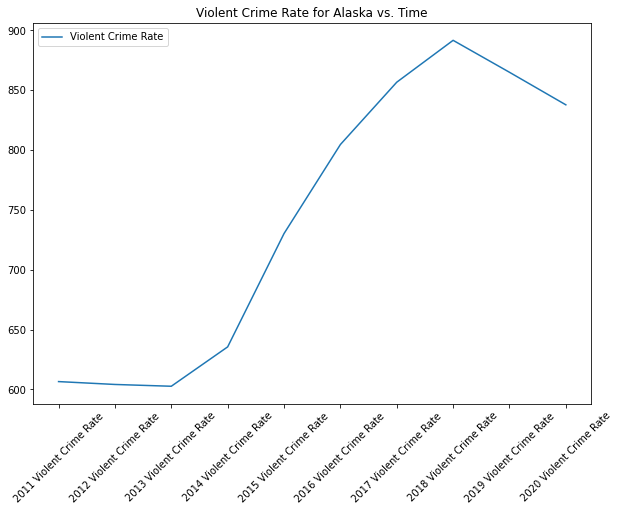

In [ ]:
fig = plt.figure(figsize =(10, 7)) #This code creates a 10x7 figure and plots the 'Violent Crime Rate' column from the df_alaska dataframe.
plt.plot(df_alaska['Violent Crime Rate'])
plt.title('Violent Crime Rate for Alaska vs. Time') #The title of the plot is set to 'Violent Crime Rate for Alaska vs. Time'.
plt.legend(['Violent Crime Rate']) #And a legend is added with the label 'Violent Crime Rate'.
plt.xticks(rotation=45) #The x-axis labels are rotated 45 degrees.
plt.show()


Students may opt to make a new column for Year, or they can use a long column name so long as data doesn't overlap on the X axis.

# Q6. Which States had crime rates go down in 2020 vs. 2019?

Print the unique values in the State column after you do your subset.

In [ ]:

# This code creates a new column in the dataframe df1 called 'CR_2020vs2019' which takes the boolean value of whether the 2020_Violent Crime Rate is lower than the 2019_Violent Crime Rate.
# Then it prints out the State or Territory names of the rows where the CR_2020vs2019 boolean value is True.
print('The states undergone Crime rate (2020 vs 2019) are:')
df1['CR_2020vs2019'] = df1['2020_Violent Crime Rate'] < df1['2019_Violent Crime Rate']
print(df1.loc[df1['CR_2020vs2019'] == True, "State or Territory"])

The states undergone Crime rate (2020 vs 2019) are:
2            Alaska
3        New Mexico
13           Nevada
15          Alabama
17       California
24         Maryland
28          Indiana
34    Massachusetts
36       Washington
37           Oregon
42           Hawaii
46         Virginia
47       New Jersey
48      Connecticut
49          Vermont
51    New Hampshire
52            Maine
Name: State or Territory, dtype: object




# Q7. Compute the raw change between 2020 and 2019 for all States and print summary statistics.
This one should have the raw units of Y - add a text cell and describe what you see in the summary statistics output.

In [ ]:
df_raw_change = (df1['2020_Violent Crime Rate']-df1['2019_Violent Crime Rate']) #This line calculates the raw change in violent crime rate between 2020 and 2019 of all states.
print('The raw change in Violent crime rate between 2020 & 2019 of all states:')
print(df_raw_change)


The raw change in Violent crime rate between 2020 & 2019 of all states:
2     -27.2
3     -45.7
4      73.8
5      91.1
6     207.7
7      79.7
8      43.1
9      20.6
10    104.3
11     39.4
12     51.9
13    -35.8
14     22.3
15    -51.1
16     24.7
17     -0.1
18      9.2
19     10.6
20     19.5
21     38.5
22     40.6
23     73.9
24    -54.5
25     83.5
26      5.4
27      2.8
28    -13.8
29     37.0
30     29.5
31     27.6
32     26.3
33     12.8
34    -19.9
35     15.9
36     -9.6
37     -1.8
38     30.0
39     40.0
40     23.8
41     38.4
42    -10.3
43     10.0
44     19.2
45      8.1
46     -1.4
47    -11.3
48     -3.0
49    -33.8
51    -11.7
52     -7.5
dtype: float64


In [ ]:
#This code will print the summary statistics of the dataframe named df_raw_change which contains the raw change between 2020 and 2019
print('Summary Statistics')
print(df_raw_change.describe())
print("1. There are 50 states included in the dataset.\n2. The average crime rate is approximately 20 points lower than the original rate.\n3. The standard deviation of 44.75 suggests that the state(s) variation in crime rates is significant.\n4. The range of difference in crime rates is between -207.7 and 54.5.")

Summary Statistics
count     50.000000
mean      20.454000
std       44.755359
min      -54.500000
25%       -6.375000
50%       17.550000
75%       38.475000
max      207.700000
dtype: float64
1. There are 50 states included in the dataset.
2. The average crime rate is approximately 20 points lower than the original rate.
3. The standard deviation of 44.75 suggests that the state(s) variation in crime rates is significant.
4. The range of difference in crime rates is between -207.7 and 54.5.


# Q8. Make a nice boxplot or histogram for the output from Q7.

Add nice labels and titles and a fun color for your boxplot.

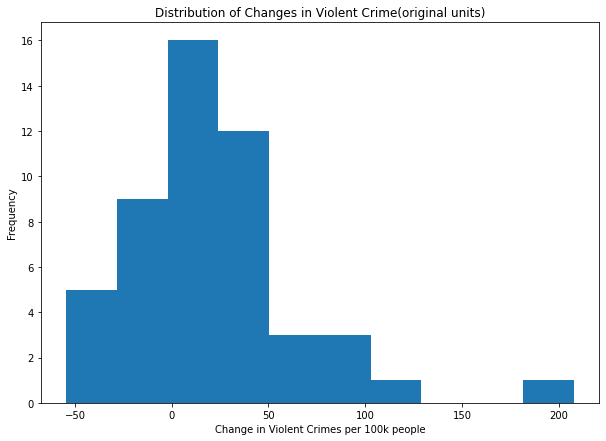

In [ ]:
fig = plt.figure(figsize =(10, 7)) #Creates a figure with a width of 10 and a height of 7
plt.hist(df_raw_change) #Creates a histogram of the values in df_raw_change
plt.title('Distribution of Changes in Violent Crime(original units)') #Adds a title to the figure
plt.xlabel('Change in Violent Crimes per 100k people') #Adds a label to the x-axis
plt.ylabel('Frequency') #Adds a label to the y-axis
plt.show() #Displays the figure



# Q9. Compute the percentage change between 2020 and 2019 for all States and print summary statistics

This one should be a percentage, of course! Don't forget to multiply by 100. The denominator should be 2019.

In [ ]:
# This code calculates the percentage change of crime rate between 2020 and 2019.
#It first subtracts the 2019 crime rate from the 2020 crime rate and then divides the result by 2020 crime rate.
#Finally, it multiplies the result by 100 to get the percentage change.
#The result is stored in the df_percent_change variable and is printed out.

df_percent_change = (df1['2020_Violent Crime Rate']-df1['2019_Violent Crime Rate'])/df1['2020_Violent Crime Rate']
df_percent_change = df_percent_change * 100
print('The percentage change  of crime rate between 2020 & 2019:')
print(df_percent_change)



The percentage change  of crime rate between 2020 & 2019:
2     -3.246598
3     -5.871772
4     10.970715
5     13.558565
6     31.719609
7     12.464811
8      7.941773
9      3.881666
10    20.801755
11     8.242678
12    11.047254
13    -7.777536
14     4.862625
15   -11.265432
16     5.531915
17    -0.022624
18     2.130123
19     2.488847
20     4.588235
21     9.099504
22     9.682805
23    18.470382
24   -13.628407
25    21.437741
26     1.407716
27     0.769654
28    -3.857982
29    10.396179
30     8.829692
31     8.389058
32     8.132344
33     4.145078
34    -6.444301
35     5.238880
36    -3.268641
37    -0.616650
38    10.302198
39    14.414414
40     9.129267
41    14.820533
42    -4.051928
43     4.122012
44     8.198121
45     3.509532
46    -0.673077
47    -5.783009
48    -1.651982
49   -19.492503
51    -7.991803
52    -6.906077
dtype: float64


In [ ]:

# This code prints the phrase "Summary statistics" followed by the description of the dataframe df_percent_change.
print('Summary statistics')
print(df_percent_change.describe())


Summary statistics
count    50.000000
mean      4.163507
std       9.558074
min     -19.492503
25%      -2.847944
50%       4.366657
75%       9.544420
max      31.719609
dtype: float64


# Q10. Make a nice boxplot or histogram for the output from Q9.

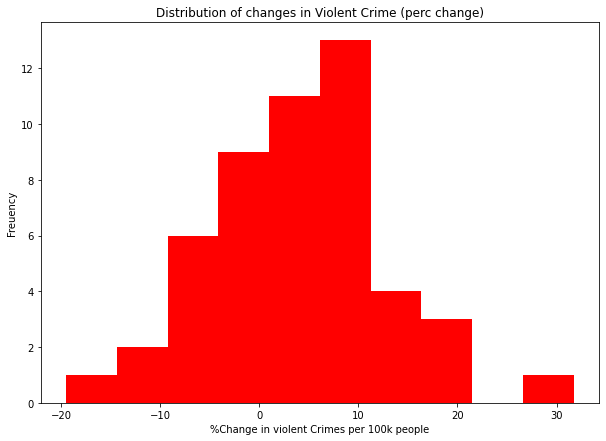

In [ ]:
fig = plt.figure(figsize =(10, 7)) #Creates a figure with a width of 10 and a height of 7
plt.hist(df_percent_change, color='red') #Creates a histogram of the values in df_percent_change
plt.title('Distribution of changes in Violent Crime (perc change)') #Adds a title to the figure
plt.xlabel('%Change in violent Crimes per 100k people') #Adds a label to the x-axis
plt.ylabel('Freuency') #Adds a label to the y-axis
plt.show() #Displays the figure